#### Explore some edge detection algorithms

In [71]:
# imports libraries
import os
import sys
import imp
import glob

import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
#import importlib
import math
import pandas as pd

%matplotlib inline 

# Grabs the preprocessing and automatic_sync files
sys.path.append(os.path.join(os.pardir,'pythonCode'))
import preprocessing as pp
import automatic_sync as autoS
from __future__ import division

In [72]:
import fracture_prediction as predict
imp.reload(predict)

<module 'fracture_prediction' from '../pythonCode/fracture_prediction.py'>

In [73]:
# reading the data

rawDataPath = os.path.join(os.pardir,'rawAudio')
files = glob.glob(os.path.join(rawDataPath,'*.wav'))
names = []
        
for name in files:
    fileName = os.path.basename(name).split(".")[0]
    names.append(fileName)

# Determines which cameras will be selected (['Bents'],['Camera Location'],['Motion #'])

filt = (None,None,['18']) # Selects the bent 1 cameras during motion 18

# Applies filter to camera names and returns only selected subset names
audioFiles = pp.getKeys(names,filt);

# Reads the .wav files from the list generted by getKeys
(names,cDataset) = pp.readWAV(rawDataPath,audioFiles);

Opening GP_B1_NL_18 ...
Opening GP_B1_NU_18 ...
Opening GP_B1_SL_18 ...
Opening GP_B1_SU_18 ...
Opening GP_B2_SL_18 ...
Opening GP_B2_SU_18 ...
Opening GP_B3_NL_18 ...
Opening GP_B3_NU_18 ...
Opening GP_B3_SL_18 ...
Opening GP_B3_SU_18 ...


In [74]:
## syncing the dataset
sDataset = autoS.sync_dataset(cDataset,names)
print(autoS.find_offset(sDataset,names[0],names[1:]))

{'GP_B1_NU_18': 116, 'GP_B1_SL_18': 157, 'GP_B3_NU_18': 3475, 'GP_B2_SL_18': 82180, 'GP_B2_SU_18': 85198, 'GP_B1_SU_18': 535, 'GP_B1_NL_18': 0, 'GP_B3_SU_18': 2607, 'GP_B3_NL_18': 4337, 'GP_B3_SL_18': 3256}


In [75]:
# res = [features.edges2fractures(cDataset[key][:,0]) for key in cDataset.keys()]

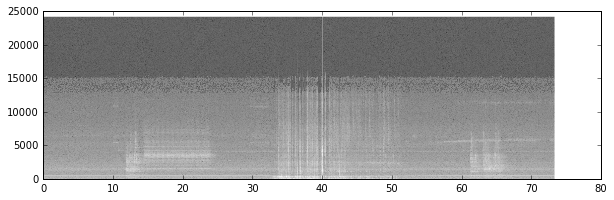

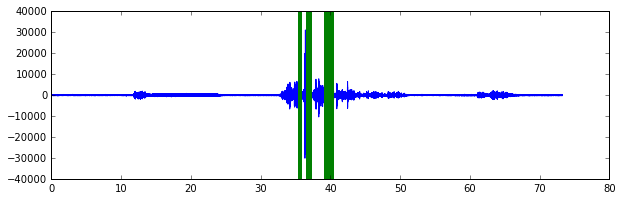

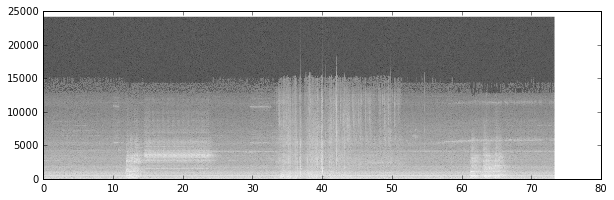

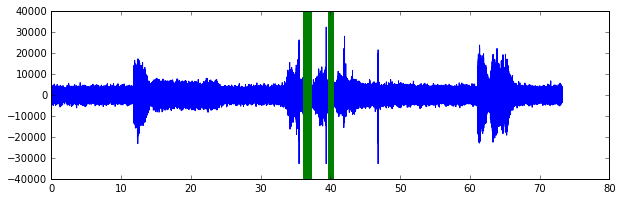

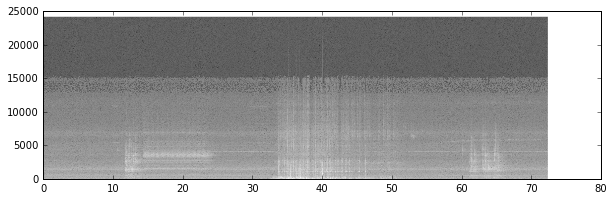

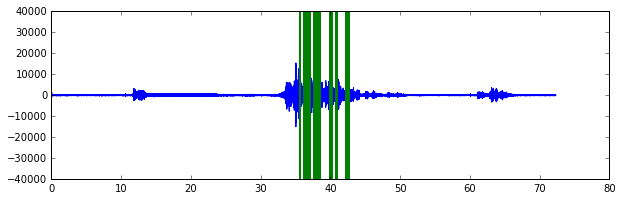

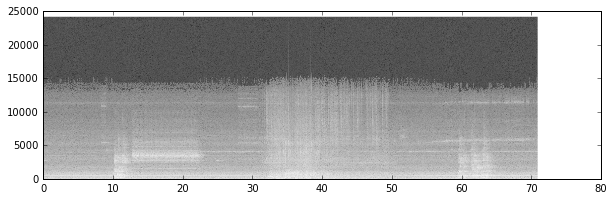

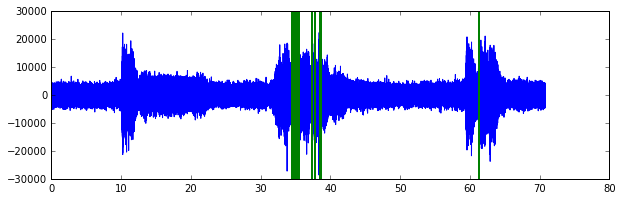

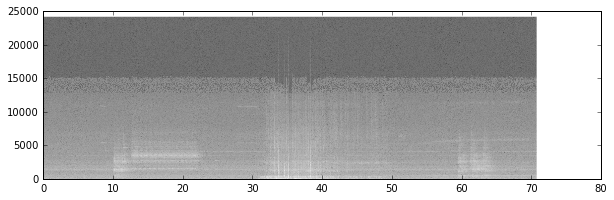

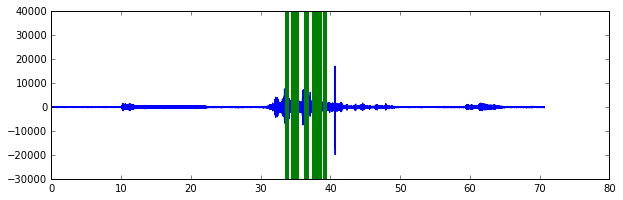

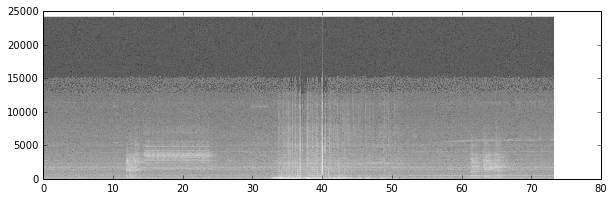

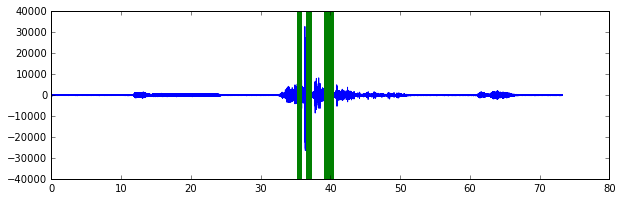

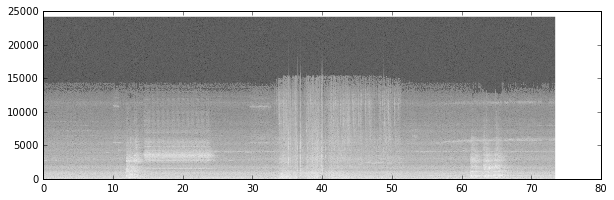

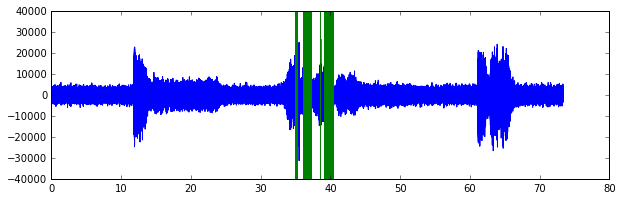

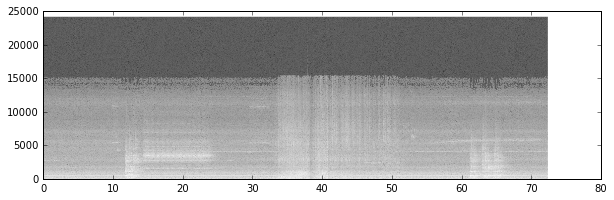

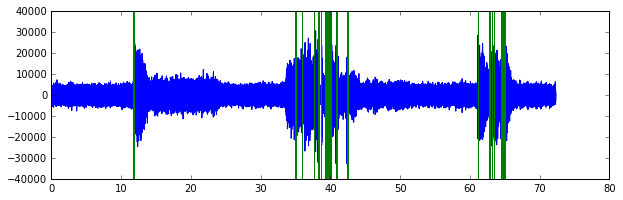

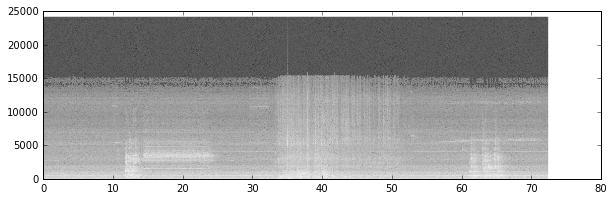

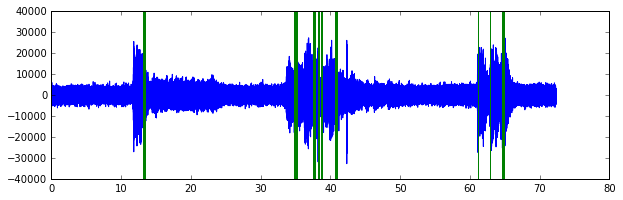

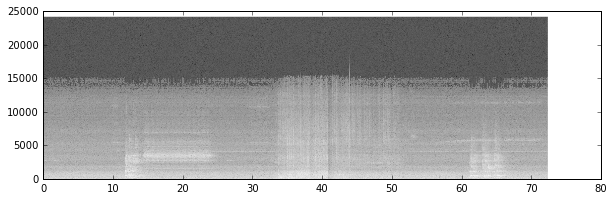

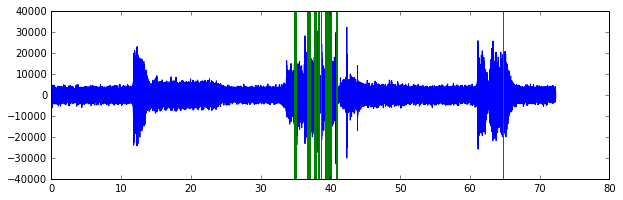

In [76]:
# extract fractures for each signal in the dataset (only the first channel)
fractureTimes = predict.applyFracturePredictor(cDataset, predict.edges2fractures, smoothing=5)

In [78]:
fractureTimes

{'GP_B1_NL_18': array([ 34.93966667,  34.96358333,  34.9875    ,  35.01141667,
         35.03533333,  35.20275   ,  35.22666667,  36.11158333,
         36.1355    ,  36.15941667,  36.18333333,  36.20725   ,
         36.23116667,  36.25508333,  36.279     ,  36.30291667,
         36.4225    ,  36.44641667,  36.47033333,  36.49425   ,
         36.61383333,  36.63775   ,  36.66166667,  36.68558333,
         36.7095    ,  36.73341667,  36.75733333,  36.78125   ,
         36.80516667,  36.82908333,  36.853     ,  36.90083333,
         36.92475   ,  36.94866667,  36.97258333,  36.9965    ,
         37.02041667,  37.04433333,  37.06825   ,  37.09216667,
         37.11608333,  37.14      ,  37.16391667,  37.18783333,
         37.21175   ,  37.23566667,  38.4315    ,  38.45541667,
         38.47933333,  38.50325   ,  38.52716667,  39.05333333,
         39.07725   ,  39.10116667,  39.12508333,  39.149     ,
         39.17291667,  39.19683333,  39.22075   ,  39.24466667,
         39.38816667,  39